In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [19]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AirQualityData_2/AirQualityData_2_byCounty_Monthly.csv', low_memory =False)
airQ_data.tail()

,County,Year,MonthNo,Value
3535,Yolo,2019,8,6.658065
3536,Yolo,2019,9,5.130000
3537,Yolo,2019,10,9.777419
3538,Yolo,2019,11,8.803333
3539,Yolo,2019,12,0.000000


In [20]:
#monthly -> yearly Mean value: method 1
airQ_data_mean = airQ_data.groupby(['County','Year'])['Value'].mean().reset_index()
airQ_data_mean.head()

,County,Year,Value
0,Alameda,2014,10.615572
1,Alameda,2015,11.195880
2,Alameda,2016,9.924854
3,Alameda,2017,13.576661
4,Alameda,2018,16.584750


In [21]:
len(airQ_data_mean)

295

In [22]:
#monthly -> yearly Mean value: method 2
airQ_data_mean1 = airQ_data.groupby(['County','Year'], as_index=False)['Value'].mean()
airQ_data_mean1.head()

,County,Year,Value
0,Alameda,2014,10.615572
1,Alameda,2015,11.195880
2,Alameda,2016,9.924854
3,Alameda,2017,13.576661
4,Alameda,2018,16.584750


In [23]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['Value'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,County,Year,Value
0,Alameda,2014,10.615572
1,Alameda,2015,11.195880
2,Alameda,2016,9.924854
3,Alameda,2017,13.576661
4,Alameda,2018,16.584750


In [24]:
len(airQ_data_mean)

295

In [25]:
airQ_data_mean['County'].unique()

array(['Alameda', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa',
       'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Humboldt ', 'Imperial', 'Inyo', 'Kern', 'Kings', 'LA', 'Lake',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Shasta', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama',
       'Trinity', 'Tulare', 'Ventura', 'Yolo'], dtype=object)

In [26]:
airQ_data_mean

,County,Year,Value
0,Alameda,2014,10.615572
1,Alameda,2015,11.195880
2,Alameda,2016,9.924854
3,Alameda,2017,13.576661
4,Alameda,2018,16.584750
...,...,...,...
290,Yolo,2015,11.344165
291,Yolo,2016,10.715124
292,Yolo,2017,10.430445
293,Yolo,2018,12.856578


In [27]:
#we will use this asthma4 data
ashtma4 = pd.read_csv('../Datasets/Disease cases/asthma-4/asthma_2014_17_final.csv', low_memory=False)
ashtma4.head()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year
0,6000,48.5,48.5,48.7,"186,540",2014
1,6001,63.2,62.0,64.5,"9,909",2014
2,6003,NaN,NaN,NaN,NaN,2014
3,6005,61.9,54.1,70.4,227,2014
4,6007,43.8,41.1,46.6,978,2014


In [28]:
#county-countycode mapping file
county_code = pd.read_csv('../Datasets/Disease cases/asthma-4/County_codes.csv',low_memory=False)
county_code.head()

,County,CountyCode
0,Alameda,6001
1,Amador,6005
2,Butte,6007
3,Calaveras,6009
4,California/Statewide,6000


In [29]:
#merging asthma4 data with county code data to get county names

ashtma4_final = pd.merge(ashtma4,county_code, on='CountyCode')
ashtma4_final.head()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,County
0,6000,48.5,48.5,48.7,"186,540",2014,California/Statewide
1,6000,49.4,49.4,49.6,"191,480",2015,California/Statewide
2,6000,44.2,44.2,44.5,"174,119",2016,California/Statewide
3,6000,45.2,45.2,45.4,"179,503",2017,California/Statewide
4,6001,63.2,62.0,64.5,"9,909",2014,Alameda


In [30]:
ashtma4_final['County'].unique()

array(['California/Statewide', 'Alameda ', 'Amador ', 'Butte ',
       'Calaveras ', 'Colusa ', 'Contra Costa ', 'Del Norte ',
       'El Dorado ', 'Fresno ', 'Glenn ', 'Humboldt ', 'Imperial ',
       'Inyo ', 'Kern ', 'Kings ', 'Lake ', 'Lassen ', 'Los Angeles ',
       'Madera ', 'Marin ', 'Mariposa ', 'Mendocino ', 'Merced ',
       'Modoc ', 'Mono ', 'Monterey ', 'Napa ', 'Nevada ', 'Orange ',
       'Placer ', 'Plumas ', 'Riverside ', 'Sacramento ', 'San Benito ',
       'San Bernardino ', 'San Diego ', 'San Francisco ', 'San Joaquin ',
       'San Luis Obispo ', 'San Mateo ', 'Santa Barbara ', 'Santa Clara ',
       'Santa Cruz ', 'Shasta ', 'Siskiyou ', 'Solano ', 'Sonoma ',
       'Stanislaus ', 'Sutter ', 'Tehama ', 'Trinity ', 'Tulare ',
       'Tuolumne ', 'Ventura ', 'Yolo ', 'Yuba '], dtype=object)

In [31]:
ashtma4_final['County'] = ashtma4_final['County'].str.strip()
ashtma4_final['County']

0      California/Statewide
1      California/Statewide
2      California/Statewide
3      California/Statewide
4                   Alameda
               ...         
223                    Yolo
224                    Yuba
225                    Yuba
226                    Yuba
227                    Yuba
Name: County, Length: 228, dtype: object

In [32]:
ashtma4_final

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,County
0,6000,48.5,48.5,48.7,"186,540",2014,California/Statewide
1,6000,49.4,49.4,49.6,"191,480",2015,California/Statewide
2,6000,44.2,44.2,44.5,"174,119",2016,California/Statewide
3,6000,45.2,45.2,45.4,"179,503",2017,California/Statewide
4,6001,63.2,62.0,64.5,"9,909",2014,Alameda
...,...,...,...,...,...,...,...
223,6113,40.4,37.8,43.2,890,2017,Yolo
224,6115,43.4,38.8,48.4,323,2014,Yuba
225,6115,45.6,40.9,50.7,345,2015,Yuba
226,6115,38.9,34.6,43.6,296,2016,Yuba


In [33]:
airQ_data_mean['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [34]:
#merging AQ data && asthma4 data

merged = pd.merge(airQ_data_mean,ashtma4_final,how='inner', left_on=['Year', 'County'], right_on=['Year','County'])

In [35]:
merged['Patient_count'] = merged['Patient_count'].str.replace(',','').astype(int)

In [37]:
len(merged)

196

In [38]:
merged

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count
0,Alameda,2014,10.615572,6001,63.2,62.0,64.5,9909
1,Alameda,2015,11.195880,6001,62.9,61.7,64.2,9929
2,Alameda,2016,9.924854,6001,55.4,54.3,56.5,9073
3,Alameda,2017,13.576661,6001,53.9,52.7,55.0,8916
4,Butte,2014,11.526889,6007,43.8,41.1,46.6,978
...,...,...,...,...,...,...,...,...
191,Ventura,2017,17.019749,6111,32.9,31.7,34.1,2826
192,Yolo,2014,9.245116,6113,39.2,36.6,42.0,813
193,Yolo,2015,11.344165,6113,40.7,38.0,43.5,851
194,Yolo,2016,10.715124,6113,35.4,33.0,38.0,768


In [39]:
merged2_filtered = ashtma4_final[ashtma4_final['County'] == 'Santa Clara']

In [40]:
merged2_filtered

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,County
168,6085,30.3,29.6,31.1,"5,643",2014,Santa Clara
169,6085,34.8,33.9,35.6,"6,514",2015,Santa Clara
170,6085,28.6,27.9,29.4,"5,522",2016,Santa Clara
171,6085,30.0,29.2,30.7,"5,849",2017,Santa Clara


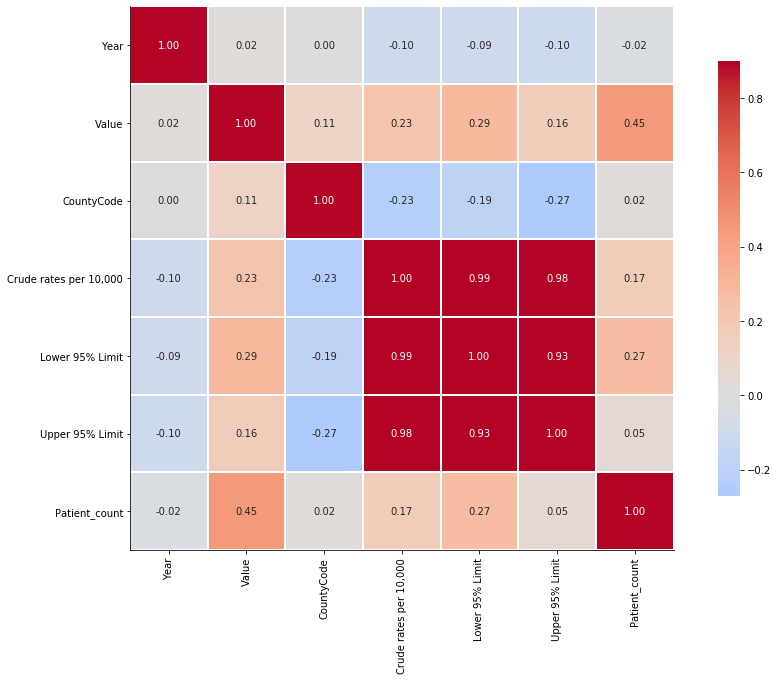

In [41]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

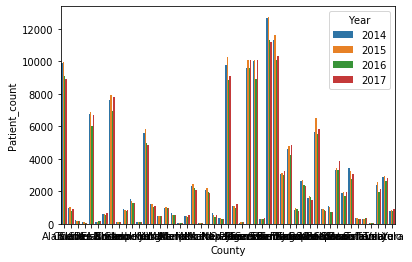

In [42]:
sns.barplot(x='County', y='Patient_count', hue='Year', data=merged, saturation=0.8)


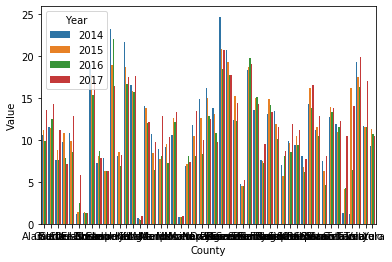

In [43]:
sns.barplot(x='County', y='Value', hue='Year', data=merged, saturation=0.8)



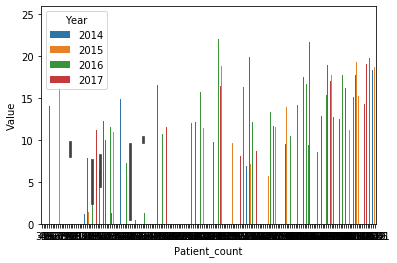

In [44]:
sns.barplot(x='Patient_count', y='Value', hue='Year', data=merged, saturation=0.8)



In [45]:
merged

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count
0,Alameda,2014,10.615572,6001,63.2,62.0,64.5,9909
1,Alameda,2015,11.195880,6001,62.9,61.7,64.2,9929
2,Alameda,2016,9.924854,6001,55.4,54.3,56.5,9073
3,Alameda,2017,13.576661,6001,53.9,52.7,55.0,8916
4,Butte,2014,11.526889,6007,43.8,41.1,46.6,978
...,...,...,...,...,...,...,...,...
191,Ventura,2017,17.019749,6111,32.9,31.7,34.1,2826
192,Yolo,2014,9.245116,6113,39.2,36.6,42.0,813
193,Yolo,2015,11.344165,6113,40.7,38.0,43.5,851
194,Yolo,2016,10.715124,6113,35.4,33.0,38.0,768


In [46]:
#county population file
county_population = pd.read_csv('../Datasets/Disease cases/asthma-4/county_population.csv',low_memory=False)
county_population.head()

,County,Year,Population
0,Alameda,2014,"1,588,576"
1,Alpine,2014,"1,163"
2,Amador,2014,"37,815"
3,Butte,2014,"223,137"
4,Calaveras,2014,"45,358"


In [47]:
#remove comma from Population column
county_population['Population'] = county_population['Population'].str.replace(',','').astype(int)
county_population.head()

,County,Year,Population
0,Alameda,2014,1588576
1,Alpine,2014,1163
2,Amador,2014,37815
3,Butte,2014,223137
4,Calaveras,2014,45358


In [48]:
#merging merged data && county_population data to get population column

merged = pd.merge(merged,county_population,how='inner', left_on=['Year', 'County'], right_on=['Year','County'])
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population
0,Alameda,2014,10.615572,6001,63.2,62.0,64.5,9909,1588576
1,Alameda,2015,11.195880,6001,62.9,61.7,64.2,9929,1611770
2,Alameda,2016,9.924854,6001,55.4,54.3,56.5,9073,1629738
3,Alameda,2017,13.576661,6001,53.9,52.7,55.0,8916,1646405
4,Butte,2014,11.526889,6007,43.8,41.1,46.6,978,223137


In [49]:
#Calculating patient ratio

merged['Patient_ratio'] = merged['Patient_count']/merged['Population']
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio
0,Alameda,2014,10.615572,6001,63.2,62.0,64.5,9909,1588576,0.006238
1,Alameda,2015,11.195880,6001,62.9,61.7,64.2,9929,1611770,0.006160
2,Alameda,2016,9.924854,6001,55.4,54.3,56.5,9073,1629738,0.005567
3,Alameda,2017,13.576661,6001,53.9,52.7,55.0,8916,1646405,0.005415
4,Butte,2014,11.526889,6007,43.8,41.1,46.6,978,223137,0.004383


In [50]:
#Calculating patient percentage

merged['Patient_percent%'] = merged['Patient_ratio']* 10000
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio,Patient_percent%
0,Alameda,2014,10.615572,6001,63.2,62.0,64.5,9909,1588576,0.006238,62.376619
1,Alameda,2015,11.195880,6001,62.9,61.7,64.2,9929,1611770,0.006160,61.603082
2,Alameda,2016,9.924854,6001,55.4,54.3,56.5,9073,1629738,0.005567,55.671525
3,Alameda,2017,13.576661,6001,53.9,52.7,55.0,8916,1646405,0.005415,54.154354
4,Butte,2014,11.526889,6007,43.8,41.1,46.6,978,223137,0.004383,43.829576


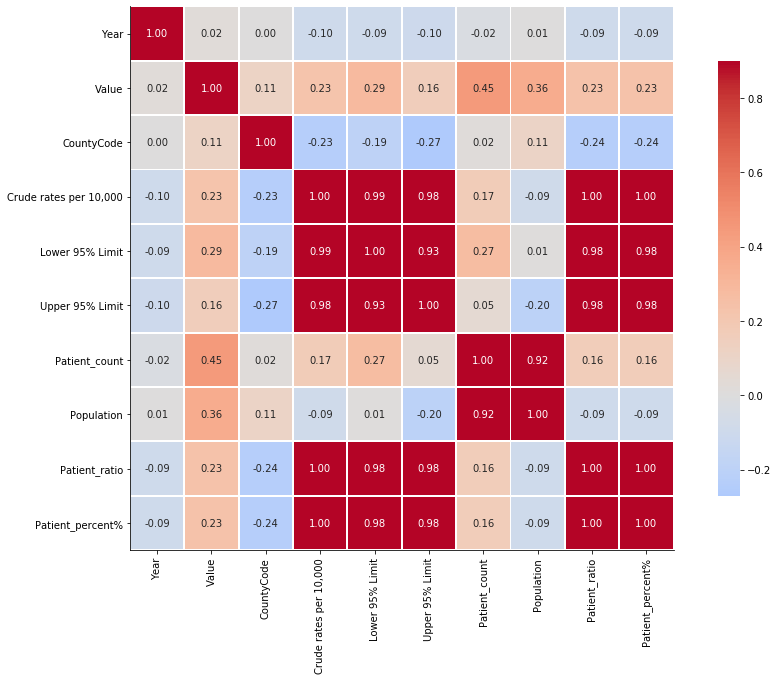

In [51]:
#again measuring the correlation - without applying county filter

corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

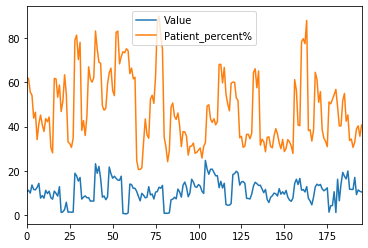

In [53]:
#plotting AQ index value vs. patient ratio
merged[['Value','Patient_percent%']].plot()

In [115]:
merged['County'].unique()

array(['Alameda', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa',
       'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Madera', 'Marin',
       'Mariposa', 'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa',
       'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Ventura',
       'Yolo'], dtype=object)

In [55]:
merged_filter_for_plot = merged[(merged['County'].isin(['Santa Clara']))]
merged_filter_for_plot

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio,Patient_percent%
148,Santa Clara,2014,9.421971,6085,30.3,29.6,31.1,5643,1880197,0.003001,30.012812
149,Santa Clara,2015,10.519511,6085,34.8,33.9,35.6,6514,1905156,0.003419,34.191426
150,Santa Clara,2016,9.400861,6085,28.6,27.9,29.4,5522,1924582,0.002869,28.691945
151,Santa Clara,2017,11.125765,6085,30.0,29.2,30.7,5849,1937473,0.003019,30.188808


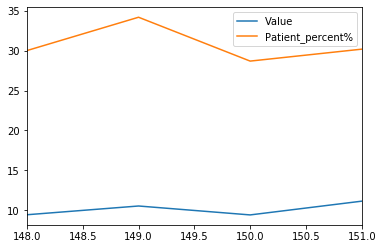

In [56]:
#plotting AQ index value vs. patient ratio
merged_filter_for_plot[['Value','Patient_percent%']].plot()

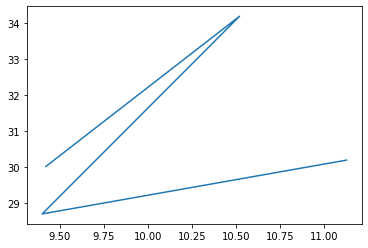

In [57]:
plt.figure()

x = merged_filter_for_plot['Value']
y = merged_filter_for_plot['Patient_percent%']


plt.plot(x,y)


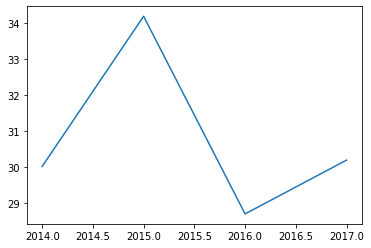

In [58]:
plt.figure()

x = merged_filter_for_plot['Year']
y = merged_filter_for_plot['Patient_percent%']

plt.plot(x,y)

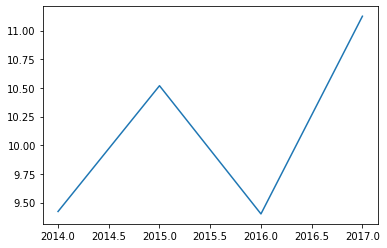

In [59]:
plt.figure()

x = merged_filter_for_plot['Value']
y = merged_filter_for_plot['Year']

plt.plot(y,x)

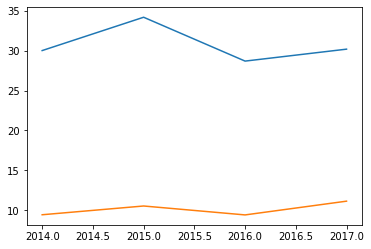

In [60]:
plt.figure()

x = merged_filter_for_plot['Year']
y1 = merged_filter_for_plot['Patient_ratio'] * 10000
y2 = merged_filter_for_plot['Value']

plt.plot(x,y1)
plt.plot(x,y2)

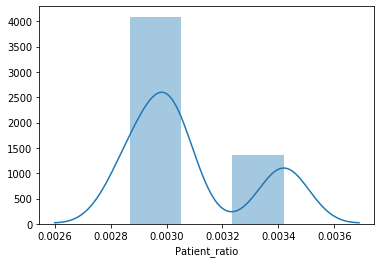

In [61]:
sns.distplot(merged_filter_for_plot['Patient_ratio'])
plt.show()

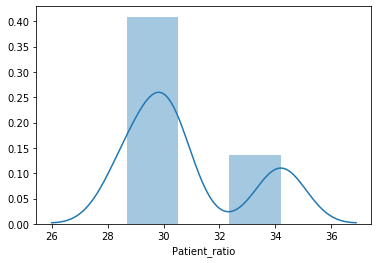

In [62]:
sns.distplot(merged_filter_for_plot['Patient_ratio']* 10000)
plt.show()

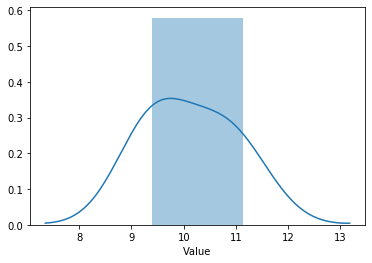

In [63]:
sns.distplot(merged_filter_for_plot['Value'])
plt.show()

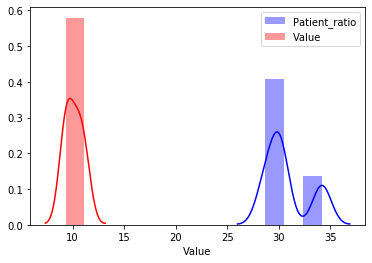

In [64]:
# Method 1: on the same Axis
sns.distplot( (merged_filter_for_plot["Patient_percent%"]) , color="blue", label="Patient_ratio")
sns.distplot( merged_filter_for_plot["Value"] , color="red", label="Value")
plt.legend()
 
plt.show()


In [71]:
merged_filter_for_plot.Value = merged_filter_for_plot.Value.astype(float)
merged_filter_for_plot

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio,Patient_percent%
148,Santa Clara,2014,9.421971,6085,30.3,29.6,31.1,5643,1880197,0.003001,30.012812
149,Santa Clara,2015,10.519511,6085,34.8,33.9,35.6,6514,1905156,0.003419,34.191426
150,Santa Clara,2016,9.400861,6085,28.6,27.9,29.4,5522,1924582,0.002869,28.691945
151,Santa Clara,2017,11.125765,6085,30.0,29.2,30.7,5849,1937473,0.003019,30.188808


In [144]:
merged

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio,Patient_percent%
0,Alameda,2014,10.615572,6001,63.2,62.0,64.5,9909,1588576,0.006238,62.376619
1,Alameda,2015,11.195880,6001,62.9,61.7,64.2,9929,1611770,0.006160,61.603082
2,Alameda,2016,9.924854,6001,55.4,54.3,56.5,9073,1629738,0.005567,55.671525
3,Alameda,2017,13.576661,6001,53.9,52.7,55.0,8916,1646405,0.005415,54.154354
4,Butte,2014,11.526889,6007,43.8,41.1,46.6,978,223137,0.004383,43.829576
...,...,...,...,...,...,...,...,...,...,...,...
191,Ventura,2017,17.019749,6111,32.9,31.7,34.1,2826,855910,0.003302,33.017490
192,Yolo,2014,9.245116,6113,39.2,36.6,42.0,813,208820,0.003893,38.933052
193,Yolo,2015,11.344165,6113,40.7,38.0,43.5,851,211078,0.004032,40.316850
194,Yolo,2016,10.715124,6113,35.4,33.0,38.0,768,215413,0.003565,35.652444


In [137]:
# Prep Training and Test data.
trainData, testData = train_test_split(merged, train_size=0.7, random_state=100)

In [120]:
#X and Y(target) for linear regression
X_trainData = trainData[['Value']]
Y_trainData= trainData[['Patient_ratio']]
X_testData= testData[['Value']]
Y_testData= testData[['Patient_ratio']]

In [121]:
# Creating linear regression model.
model1= LinearRegression()

In [122]:
model1.fit(X_trainData,Y_trainData)
predictions = model.predict(X_testData)

In [123]:
# Get the slope and intercept of the line best fit.
print(model1.intercept_)


print(model.coef_)

[0.00419702]
[[5.09385054e-05]]


In [124]:
# print the R-squared value for the model
model1.score(X_trainData, Y_trainData)

0.0305897283157387

In [125]:
# print the R-squared value for the model
print(model.score(X_testData,Y_testData)  )

0.07441078048614203


In [169]:
#X and Y(target) for logistic regression 
X_trainData = trainData[['Value','CountyCode']]
Y_trainData= trainData['Crude rates per 10,000']
X_testData= testData[['Value','CountyCode']]
Y_testData= testData['Crude rates per 10,000']

len(X_testData)
len(Y_testData)

59

In [170]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
Y_trainData_encoded = lab_enc.fit_transform(Y_trainData)

print(utils.multiclass.type_of_target(Y_trainData))
print(utils.multiclass.type_of_target(Y_trainData.astype('int')))
print(utils.multiclass.type_of_target(Y_trainData_encoded))

Y_testData_encoded = lab_enc.fit_transform(Y_trainData)

print(utils.multiclass.type_of_target(Y_testData))
print(utils.multiclass.type_of_target(Y_testData.astype('int')))
print(utils.multiclass.type_of_target(Y_testData_encoded))
print(len(Y_testData_encoded))

continuous
multiclass
multiclass
continuous
multiclass
multiclass
137


In [164]:
# Creating Logistic regression model.
model2= LogisticRegression()

In [165]:
model2.fit(X_trainData,Y_trainData_encoded)
predictions = model2.predict(X_testData)

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [166]:
# Accuracy calculation
print('Accuracy with up sampled data:',(accuracy_score(Y_testData_encoded, predictions) * 100) ,"%")

ValueError: Found input variables with inconsistent numbers of samples: [137, 59]